In [88]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os

def calc_Z(p, a, b):
    return a*p + b

# fit a0 + a1*x = y, with analytical method
def linear_fit_analytical(xs, ys, sigmas, xlabel='x', ylabel='y', legloc='upper left', bprint=False, saveloc='tmp.png', errbarlabel='points', plotlabel='analytical fit Z(p)', p_a=9999999):
    x=xs
    y=ys
    cm=1.06
    sig = sigmas
    w = 1/sig**2
    # normalmatrix 2x2
    N = np.zeros((2,2))
    N[0,0] = np.sum(w)
    N[0,1] = np.sum(w * x)
    N[1,0] = np.sum(w * x)
    N[1,1] = np.sum(w * x**2)
    # solution vector
    Y = np.zeros((2,1))
    Y[0] = np.sum(w * y)
    Y[1] = np.sum(w * x * y)
    # mit der Lösung
    a = np.linalg.inv(N)@Y
    # A@B is a shorthand for np.dot(A,B) and retuns the matrix product, while A*B attempts elementwise multiplication
    if bprint:
        print("solution vector:")
        print(a)
    # und der Covarianz-Matrix
    C = np.linalg.inv(N)
    if bprint:
        print("Covarianz Matrix:")
        print(C)
    a0_error = np.sqrt(C[0,0])
    a1_error = np.sqrt(C[1,1])
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(1,1,figsize=(6*cm, 7*cm))
    ax.plot(x, a[0,0] + a[1,0]*x, label=plotlabel, color='red')
    ax.errorbar(x, y, yerr=sig, linestyle='', capsize=3, color='black', label=errbarlabel)
    ax.set_title('Z(p) = ap + b \n $a=%.4f \pm %.4f$ \n $b=%.2f \pm %.2f$' % (a[1], a1_error, a[0], a0_error ))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc=legloc, fontsize=16)
    fig.tight_layout(pad=0.1)
    if bprint:
        print('a0 = ', '%.5f' % a[0])
        print('a1 = ', '%.5f' % a[1])
        print('a0_err = ', '%.5f' % a0_error)
        print('a1_err = ', '%.5f' % a1_error)
    A=a[1]
    B=a[0]
    UPPER = calc_Z(p_a,A,B)
    LOWER = calc_Z(0.0,A,B)
    Z_a = UPPER - LOWER
    #plt.axhline(y=UPPER, color='green', linestyle='-', label='Z(p=p_a)', alpha=0.5)
    #plt.axhline(y=LOWER, color='green', linestyle='-', label='Z(p=0)', alpha=0.5)
    ax.axhspan(ymin=(LOWER if LOWER<UPPER else UPPER), ymax=(UPPER if UPPER>LOWER else LOWER), xmin=0.0, xmax=p_a, alpha=0.3)
    plt.savefig(saveloc)
    plt.show()
    return a[1], a[0], a1_error, a0_error

p_a =  95492.5
Z 1 down


c:\Users\domin\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\patches.py:1145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)


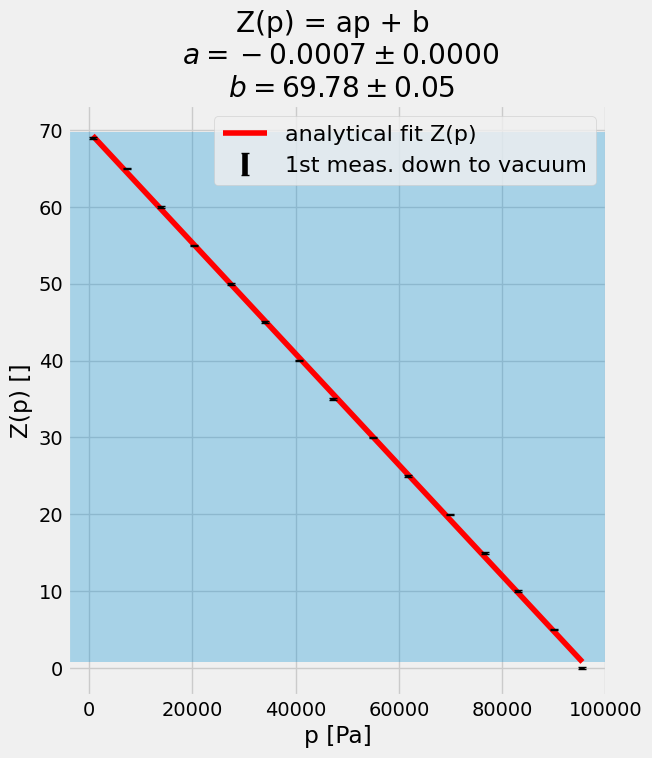

Z(p=0) for Z 1 down is 6.978481e+01
Z_a for Z 1 down is -6.895521e+01
Z 2 down


c:\Users\domin\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\patches.py:1145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)


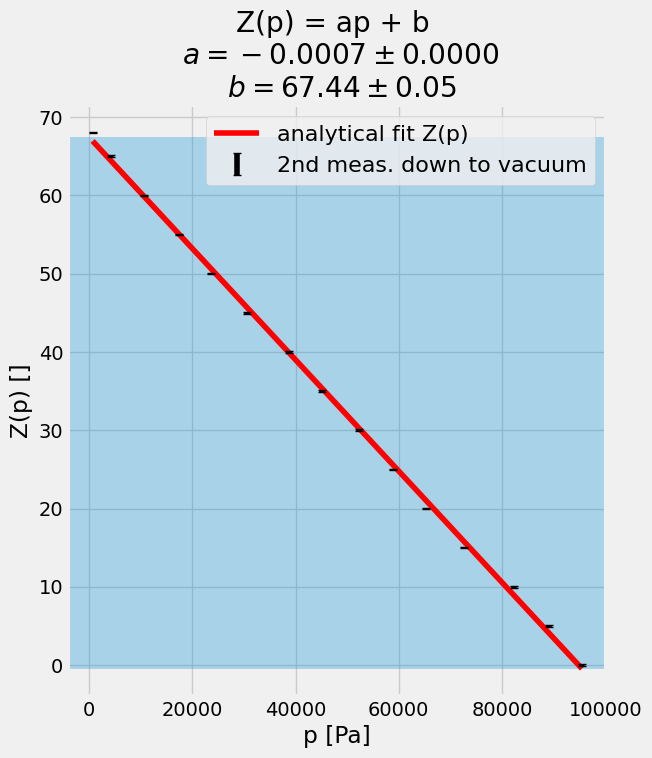

Z(p=0) for Z 2 down is 6.744036e+01
Z_a for Z 2 down is -6.789999e+01
Z 1 up


c:\Users\domin\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\patches.py:1145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)


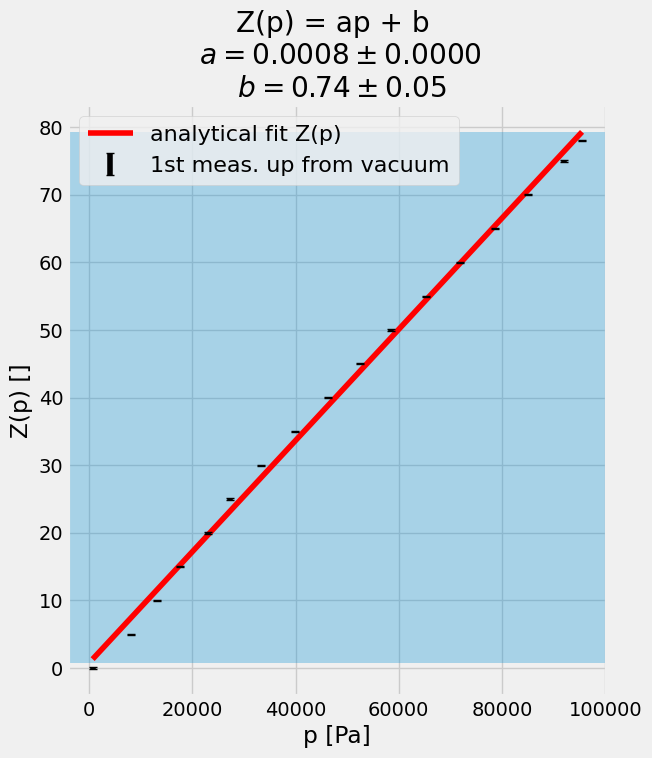

Z(p=0) for Z 1 up is 7.355923e-01
Z_a for Z 1 up is 7.856806e+01
Z 2 up


c:\Users\domin\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\patches.py:1145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray(xy)


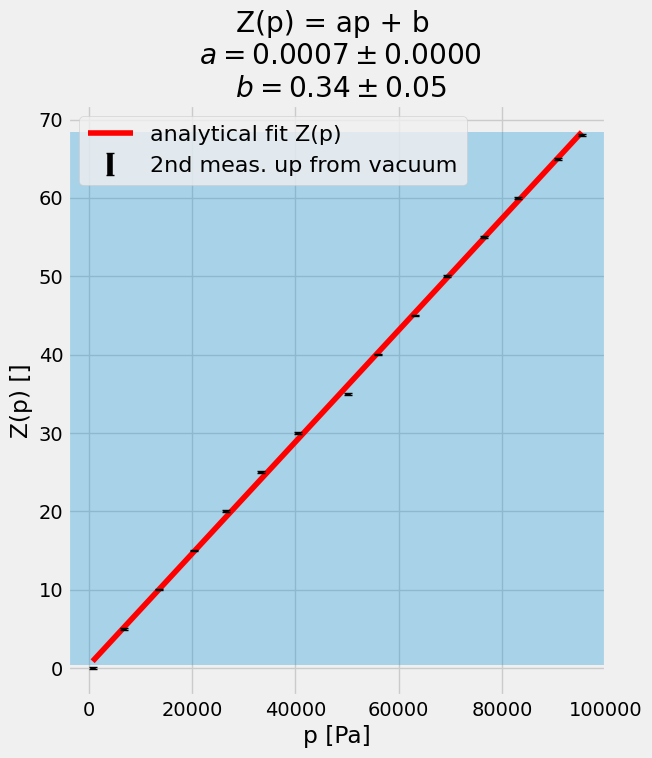

Z(p=0) for Z 2 up is 3.419847e-01
Z_a for Z 2 up is 6.808481e+01


In [89]:
from matplotlib.pyplot import ylabel

# Z(p) = ap+b

filename = os.path.join(os.getcwd(), "data_2_down.csv")
Z_2down, p_2down = np.genfromtxt(filename, delimiter=',', skip_header=1, unpack=True)

filename = os.path.join(os.getcwd(), "data_1_down.csv")
Z_1down, p_1down = np.genfromtxt(filename, delimiter=',', skip_header=1, unpack=True)

filename = os.path.join(os.getcwd(), "data_2_up.csv")
Z_2up, p_2up = np.genfromtxt(filename, delimiter=',', skip_header=1, unpack=True)

filename = os.path.join(os.getcwd(), "data_1_up.csv")
Z_1up, p_1up = np.genfromtxt(filename, delimiter=',', skip_header=1, unpack=True)

# do not change these lists
labels_arr = ["Z 1 down", "Z 2 down", "Z 1 up", "Z 2 up"]
errbarlabels = ["1st meas. down to vacuum", "2nd meas. down to vacuum", "1st meas. up from vacuum", "2nd meas. up from vacuum"]
Z_arrarr = [Z_1down, Z_2down, Z_1up, Z_2up]
p_arrarr = [p_1down*100, p_2down*100, p_1up*100, p_2up*100]

# SETTING P_a pressure value
p_max_values = [np.max(p_arr) for p_arr in p_arrarr]
p_a = np.mean(p_max_values)
print("p_a = ", p_a)

# SETTING UNCERTAINTIES (look inside for loop to see further calculations of propagated uncertainties)
sig_p_reading_and_device=2 #mbar (device has 0.05mbar uncertainty +other fluctuations when letting gas in and stuff)
sig_Z=1/10

# EMPTY LISTS OF VALUES WE'RE GONNA CALCULATE
Z_a_values = np.zeros(4) # Calculated values for the Za
a_values_normed = np.zeros(4) # Calculated slopes 'a'^of Z(p)=ap+b
a_errors_normed_by_fit = np.zeros(4) # Errors calculated together with the slopes (a's) in the fit
b_values_normed = np.zeros(4) # Nullpunktdurchschnitte
b_errors_normed_by_fit = np.zeros(4) # Nullpunktdurchschnitt fehler von fits
for i in range(0,len(Z_arrarr)):
    Z,p=Z_arrarr[i], p_arrarr[i]
    print(labels_arr[i])
    dZ_dp= Z[-1]/p[0] if i <= 1 else Z[-1]/p[-1] # dZ_dp is approximately the Z range over the largest p... (not exactly but almost)
    sig_prop_p_to_Z = np.sqrt((sig_p_reading_and_device**2) * (dZ_dp**2)) # The error from p goes to an error of Z by error propagation formulas
    sig_Z_tot=sig_Z+sig_prop_p_to_Z
    sig=np.ones(len(Z))*sig_Z_tot
    a,b,a_err,b_err = linear_fit_analytical(p,Z,sig, xlabel='p [Pa]', ylabel='Z(p) []', legloc=('upper right' if i <= 1 else 'upper left'), saveloc=("%s.png" % (labels_arr[i])), errbarlabel=errbarlabels[i], p_a=p_a)
    Z_0 = calc_Z(0.0, a, b)
    print("Z(p=0) for %s is %.6e" % (labels_arr[i], Z_0))
    Z_a = calc_Z(p_a,a,b) - calc_Z(0.0,a,b)
    print("Z_a for %s is %.6e" % (labels_arr[i], Z_a))
    Z_a_values[i] = np.abs(Z_a)
    a_values_normed[i], a_errors_normed_by_fit[i] = np.abs(a), a_err
    b_values_normed[i],b_errors_normed_by_fit[i]= b if i >= 2 else b-Z_a_values[i],b_err#b, b_err


In [90]:
print("All the Z_a values are: ", Z_a_values)
print("Mean of the Z_a Values:", np.mean(Z_a_values))
print("Std of Z_a values: ", np.std(Z_a_values))

# slopes of Z(p) to calculate the rest -> average(a), std(a)
print("All the slope (a) values of Z(p) are: ", a_values_normed)
print("The mean slope (a) value of Z(p) is: %.9e and the standard deviation is %9e" % (np.mean(a_values_normed), np.std(a_values_normed)))
print("The fitting (a) errors are: ", a_errors_normed_by_fit)
# b
print("All the b values of Z(p) are: ", b_values_normed)
print("The mean b value of Z(p) is: %.9e and the standard deviation is %9e" % (np.mean(b_values_normed), np.std(b_values_normed)))
print("The fitting (b) errors are: ", b_errors_normed_by_fit)

# STANDARD DEVIATION (a) > a_errors_by_fit so:
a_unc = np.std(a_values_normed)
print("a_unc = ", a_unc)

yIntercept_unc = np.std(b_values_normed)
if (yIntercept_unc < np.max(b_errors_normed_by_fit)):
    yIntercept_unc = np.max(b_errors_normed_by_fit)
    print("max b errors by fit was higher than std(b)")
else:
    print("max b errors by fit was lower than std(b)")

# Propagate a_unc to Za_unc
# Za = a*p_a + b so:
a_to_Za_prop = np.sqrt(np.square(a_unc)*np.square(p_a) + np.square(yIntercept_unc)*1) #p_a = dZa/da
print("a_to_z_prop = ", a_to_Za_prop)

Za = np.mean(Z_a_values)
# Za unc based on which is higher
Za_unc = np.std(Z_a_values)
if (Za_unc < a_to_Za_prop):
    Za_unc = a_to_Za_prop
    print("a_to_Zprop was higher")
else:
    print("std Za was higher")

# all data sets all graphs, see above
# all standard deviations and all uncertainties
# show all the equations especially those belonging to the graphs
# TODO Z(p)=???

All the Z_a values are:  [68.95521378 67.89998995 78.56805917 68.0848127 ]
Mean of the Z_a Values: 70.87701890206455
Std of Z_a values:  4.458266260898189
All the slope (a) values of Z(p) are:  [0.0007221  0.00071105 0.00082277 0.00071299]
The mean slope (a) value of Z(p) is: 7.422260272e-04 and the standard deviation is 4.668708e-05
The fitting (a) errors are:  [8.80052087e-07 8.70934340e-07 8.35522159e-07 8.73153833e-07]
All the b values of Z(p) are:  [ 0.82959415 -0.45962581  0.73559232  0.34198472]
The mean b value of Z(p) is: 3.618863451e-01 and the standard deviation is 5.083515e-01
The fitting (b) errors are:  [0.04990162 0.04772474 0.04677569 0.04973366]
a_unc =  4.668708286931634e-05
max b errors by fit was lower than std(b)
a_to_z_prop =  4.487154924021425
a_to_Zprop was higher


In [91]:
# Calculate the other stuff:
l = 0.1658 # was written on the device
l_unc = 0.0001 # was written on the device


lambda_0 = 589.3e-9 # 589.3 * 10^-9m += 0.05 * 10^-9m ## https://ap.phys.ethz.ch/Anleitungen/Bilingual/14_Manual.pdf
lambda_0_unc = 0.05e-9

def calc_n_paT(Za, Za_unc, l, l_unc, lambda_0, lambda_0_unc, p_a='const', T='const'):
    dn_dZa = lambda_0/l
    dn_dlambda0 = Za/l
    dn_dl=-(Za*lambda_0)/np.square(l)
    n_pa_T_unc = np.sqrt(np.square(Za_unc)*np.square(dn_dZa) + np.square(lambda_0_unc)*np.square(dn_dlambda0) + np.square(l_unc)*np.square(dn_dl))
    n_pa_T = 1 + (Z_a / l)*lambda_0
    print("n_paTa = %.6e += %.6e" % (n_pa_T, n_pa_T_unc))
    return n_pa_T, n_pa_T_unc

n_paTa, n_paTa_unc = calc_n_paT(Za, Za_unc, l, l_unc, lambda_0, lambda_0_unc)

n_paTa = 1.000242e+00 += 1.594935e-05


In [92]:
from ast import Lambda


def calc_LambdaT(Za, Za_unc, pa, lambda_0, lambda_0_unc, l, l_unc):
    dL_dZa = lambda_0/(pa*l)
    dL_dlambda0 = Za/(pa*l)
    dL_dl = -(Za*lambda_0)/(pa*np.square(l))
    LambdaT_unc = np.sqrt(np.square(Za_unc)*np.square(dL_dZa) + np.square(lambda_0_unc)*np.square(dL_dlambda0) + np.square(l_unc)*np.square(dL_dl))
    LambdaT = (Za*lambda_0)/(pa*l)
    print("LambdaT = %.6e += %.6e" % (LambdaT, LambdaT_unc))
    return LambdaT, LambdaT_unc

Ta= +273.15 + 19.8
Ta_unc = 0.2
LambdaTa, LambdaTa_unc = calc_LambdaT(Za, Za_unc, p_a, lambda_0, lambda_0_unc, l, l_unc)
fact123=LambdaTa*Ta
dL_dTa = (-1*fact123)/np.square(Ta)
LambdaTa_Tprop = np.sqrt(np.square(Ta_unc)*np.square(dL_dTa))
print("LambdaT uncertainty prop of T (can be neglected):", LambdaTa_Tprop)

# Check: n = 1 + LambdaT*p Eq. (15)
print(1 + LambdaTa*p_a)


LambdaT = 2.638081e-09 += 1.670221e-10
LambdaT uncertainty prop of T (can be neglected): 1.8010450979066138e-12
1.0002519169314776


In [95]:
T0 = +273.15 #= 0°C
p0 = 101300 # 1013 hPa

def Kappa(p, T):
    N = 6.022e23
    R = 8.31446261815324 # kg⋅m2⋅s−2⋅K−1⋅mol−1 https://en.wikipedia.org/wiki/Gas_constant
    return (N*p)/(R*T)

def calcLambdaT(T):
    unc = (LambdaTa_unc + LambdaTa_Tprop)*Ta/T
    return fact123/T, unc

def calc_n_for_TP(T, p):
    n_Ta_pa = n_paTa
    Pa = p_a
    LambdaT, LambdaT_unc = calcLambdaT(T)

    n_Ta_p = 1 + LambdaTa*p
    n_T_p = 1 + LambdaT*p
    n_T_p_unc = np.sqrt(np.square(LambdaT_unc)*np.square(p))
    print("For T=%.1f, p=%.3f, it is Lambda(T)=%.6e += %.6e, n(T,p)=%.6e += %.6e" % (T,p,LambdaT, LambdaT_unc,n_T_p, n_T_p_unc))

    return n_T_p

# n0 for air at T = 0°C and p0
n0 = calc_n_for_TP(T=T0, p=p0)


For T=273.1, p=101300.000, it is Lambda(T)=2.829309e-09 += 1.810607e-10, n(T,p)=1.000287e+00 += 7.403047e-06
